In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('encuesta_procesada.csv')

In [11]:

# Paso 2: Seleccionar y renombrar las columnas relevantes
selected_columns = [
    '5.- ¿Con qué frecuencia conduce?',
    '6.- ¿Qué tipo de carreteras utiliza con más frecuencia?',
    '7.- ¿Con qué frecuencia conduce por la noche?',
    '10.- ¿Qué le motiva a comprar un servicio de rastreo satelital?',
    '11.- Si tuviera Ud. Rastreo Satelital, ¿Qué considera importante rastrear?',
    '16.- ¿Qué considera Ud. que necesita una aplicación móvil para rastrear vehículos y activos?',
    '17.- ¿Qué tipo de beneficios busca al utilizar un servicio de rastreo satelital?', 
    '21.- ¿Ha tenido alguna vez problemas con el robo o la pérdida de sus vehículos?',
    '22.- ¿Qué tan importante es para usted tener acceso a la información en tiempo real sobre la ubicación de sus vehículos o activos?'
]

df = df[selected_columns]
df.columns = [
    'Frecuencia_Conduccion',
    'Tipo_Carretera',
    'Frecuencia_Conduccion_Noche',
    'Motivacion para comprar rastreo',
    'Mas importante en rastreo satelital',
    'Necesita App para rastreo',
    'Beneficios de rastreo Satelital',
    'Problemas con robo en sus vehiculos',
    'Importancia_Info_Real'
]

In [12]:
df

,Frecuencia_Conduccion,Tipo_Carretera,Frecuencia_Conduccion_Noche,Motivacion para comprar rastreo,Mas importante en rastreo satelital,Necesita App para rastreo,Beneficios de rastreo Satelital,Problemas con robo en sus vehiculos,Importancia_Info_Real
0,Diariamente,Autopistas,Nunca,Tranquilidad,Rastreo de vehículos,GPS Tracker – Video tracking,Monitoreo en tiempo real,Si,Importartante
1,Diariamente,Calles urbanas,Diariamente,Seguridad,Rastreo de vehículos;Rastreo de mercadería;Ras...,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,Importartante
2,Nunca,Bus,Nunca,Seguridad,Rastreo de vehículos;Rastreo de personas,Imágenes en 3D,Protección de sus vehículos,No,Importartante
3,Una vez a la semana,Calles urbanas,Nunca,Seguridad,Rastreo de vehículos,GPS Tracker – Video tracking,Protección de sus vehículos,No,Importartante
4,Una vez a la semana,Caminos rurales,Diariamente,Seguridad,Rastreo de vehículos,Compartir ubicación en tiempo real,Monitoreo en tiempo real,No,Importartante
...,...,...,...,...,...,...,...,...,...
498,Varias veces a la semana,Bus,Ocasionalmente,Seguridad;Tranquilidad;Control,Rastreo de vehículos;Rastreo de mercadería,Compartir ubicación en tiempo real,Monitoreo en tiempo real;Informes detallados,No,Importartante
499,Varias veces a la semana,Calles urbanas,Ocasionalmente,Seguridad,Rastreo de vehículos,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,Importartante
500,Diariamente,Bus,Ocasionalmente,Seguridad,Rastreo de vehículos,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,Importartante
501,Varias veces a la semana,Calles urbanas,Ocasionalmente,Control,Rastreo de vehículos,Imágenes en 3D,Protección de sus vehículos,No,Importartante


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Codificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_columns])

# Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(encoded_data.toarray())


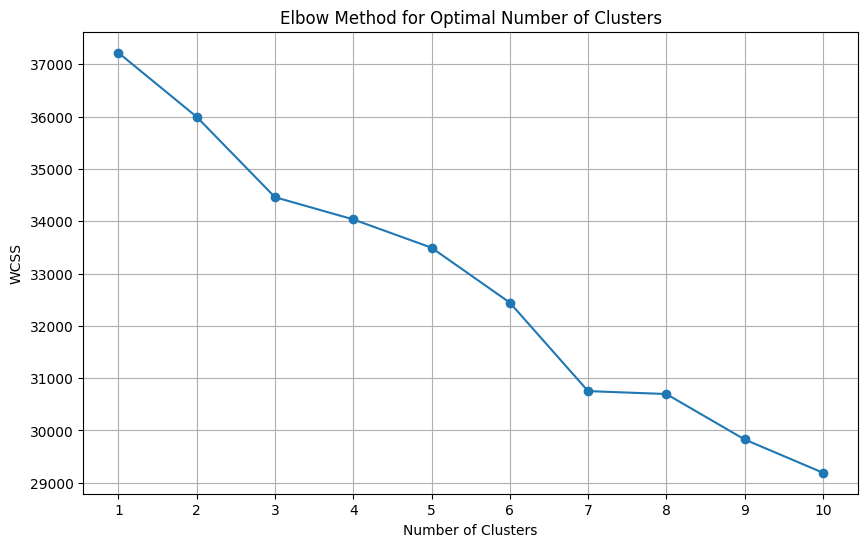

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=8)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [15]:
n_clusters=7

kmeans = KMeans(n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(normalized_data)
df['Cluster'] = clusters

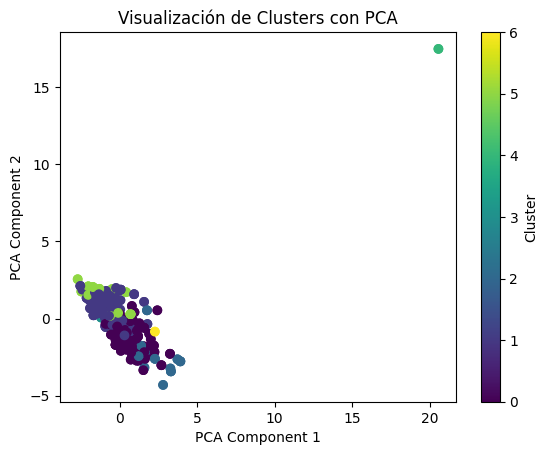

In [16]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualización de Clusters con PCA')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
# Calcular la importancia de cada variable en cada cluster
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
overall_means = df[numeric_columns].mean()
importance = np.abs(cluster_means - overall_means)

In [19]:
# Calcular la frecuencia de cada valor dentro de cada cluster
for column in df.columns:
    if column != 'Cluster':
        value_counts = df.groupby(['Cluster', column])[column].count()
        print(f"Valores en '{column}':\n{value_counts}\n")


Valores en 'Frecuencia_Conduccion':
Cluster  Frecuencia_Conduccion       
0        Diariamente                     116
         Menos de una vez a la semana     14
         Una vez a la semana              12
         Varias veces a la semana         27
1        Diariamente                     194
         Menos de una vez a la semana     11
         Una vez a la semana               9
         Varias veces a la semana         32
2        Diariamente                      12
         Menos de una vez a la semana      3
         Una vez a la semana               5
         Varias veces a la semana         11
3        Diariamente                       2
4        Menos de una vez a la semana      2
5        Diariamente                       7
         Menos de una vez a la semana      3
         Nunca                            21
         Una vez a la semana               3
         Varias veces a la semana         17
6        Diariamente                       2
Name: Frecuencia_Conduccio

In [20]:
# Combinar información de importancia y frecuencia
for cluster in range(7):
    print(f"\nCluster {cluster}:")
    sorted_importance = importance.loc[cluster].sort_values(ascending=False)
    for variable in sorted_importance.index:
        print(f"Variable: {variable}, Importancia: {sorted_importance[variable]}")
        
        # Obtener los valores más relevantes para esa variable
        value_counts = df.groupby(['Cluster', variable])[variable].count().loc[cluster]
        most_frequent_values = value_counts.sort_values(ascending=False).index[:3]  # Top 3 valores más frecuentes
        
        print(f"Valores más relevantes: {most_frequent_values}")



Cluster 0:
Variable: Cluster, Importancia: 1.1709741550695825
Valores más relevantes: Index([0], dtype='int32', name='Cluster')

Cluster 1:
Variable: Cluster, Importancia: 0.17097415506958247
Valores más relevantes: Index([1], dtype='int32', name='Cluster')

Cluster 2:
Variable: Cluster, Importancia: 0.8290258449304175
Valores más relevantes: Index([2], dtype='int32', name='Cluster')

Cluster 3:
Variable: Cluster, Importancia: 1.8290258449304175
Valores más relevantes: Index([3], dtype='int32', name='Cluster')

Cluster 4:
Variable: Cluster, Importancia: 2.8290258449304178
Valores más relevantes: Index([4], dtype='int32', name='Cluster')

Cluster 5:
Variable: Cluster, Importancia: 3.8290258449304178
Valores más relevantes: Index([5], dtype='int32', name='Cluster')

Cluster 6:
Variable: Cluster, Importancia: 4.829025844930418
Valores más relevantes: Index([6], dtype='int32', name='Cluster')


In [21]:
import numpy as np

# Analizar las características más relevantes de cada cluster
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)


         Cluster
Cluster         
0            0.0
1            1.0
2            2.0
3            3.0
4            4.0
5            5.0
6            6.0


In [23]:
# Evaluar la importancia de las variables en cada cluster
for column in numeric_columns:
    cluster_means = df.groupby('Cluster')[column].mean()
    overall_mean = df[column].mean()
    relevance = np.abs(cluster_means - overall_mean)
    print(f'Variable: {column}, Relevancia: {relevance}')

Variable: Cluster, Relevancia: Cluster
0    1.170974
1    0.170974
2    0.829026
3    1.829026
4    2.829026
5    3.829026
6    4.829026
Name: Cluster, dtype: float64
